In [1]:
import pre_process_data
import Custom_dataset_classification

import TransformerEncoder_LatentSpace_ClassifierModel


from torch import optim
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torch

import tensorflow as tf
import tensorboard as tb
from torch.utils.tensorboard import SummaryWriter
tf.io.gfile = tb.compat.tensorflow_stub.io.gfile

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import seaborn as sns
seed = 0
torch.manual_seed(seed)
#torch.cuda.manual_seed_all(seed)
from sklearn.model_selection import KFold

from sklearn.metrics import confusion_matrix

In [2]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
data, word2index, index2word, source_vocab_max_size, vocab = pre_process_data.FinalData('Top_Posts.xlsx')
data

F:\Data Mining Final Project\pre_process_data.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['subreddit_encoded'] = labelencoder.fit_transform(data['subreddit']
F:\Data Mining Final Project\pre_process_data.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['post_title'] = data['post_title'].apply(lambda x: remove_stopwords(x, stop_words))
F:\Data Mining Final Project\pre_process_data.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,post_title,subreddit,subreddit_encoded,idx_encoded
0,from book present 10 ar ml,MachineLearning,0,"[1, 1988, 847, 3884, 11, 549, 3, 3176, 2]"
1,a emo 1993 32yearol yann lecun show worl first...,MachineLearning,0,"[1, 291, 1550, 102, 170, 5716, 2867, 4581, 567..."
2,first orer motion moel appli anim paint,MachineLearning,0,"[1, 1875, 3563, 3235, 3191, 535, 471, 3628, 2]"
3,ai turn ol photo move imag link given comment...,MachineLearning,0,"[1, 364, 5308, 3499, 3740, 3242, 2457, 3, 2912..."
4,thi ai reveal much time politician stare phone...,MachineLearning,0,"[1, 5122, 364, 4274, 3250, 5158, 3828, 4799, 3..."
...,...,...,...,...
2982,we live beauti time learn machin learn ai beco...,artificial,1,"[1, 5563, 2930, 741, 5158, 2858, 2981, 2858, 3..."
2983,yann lecunâ€™ eep learn cours free from nyu,artificial,1,"[1, 5716, 2868, 1474, 2858, 1332, 1971, 1988, ..."
2984,you can now learn free 9 cours googl artifici ...,artificial,1,"[1, 5739, 953, 3421, 2858, 1971, 279, 1332, 21..."
2985,chatbot train public omain social meium conver...,artificial,1,"[1, 1047, 5240, 3990, 3507, 4686, 3093, 1289, ..."


In [4]:
word2index

{'': 3,
 '0005': 4,
 '001': 5,
 '016': 6,
 '030': 7,
 '07212022': 8,
 '099': 9,
 '1': 10,
 '10': 11,
 '100': 12,
 '1000': 13,
 '10000': 14,
 '100000': 15,
 '10000x': 16,
 '1000x5': 17,
 '100ay': 18,
 '100circl': 19,
 '100k': 20,
 '100m': 21,
 '101': 22,
 '1015': 23,
 '1020': 24,
 '1024x1024': 25,
 '103k': 26,
 '108': 27,
 '109': 28,
 '10am': 29,
 '10m': 30,
 '10x': 31,
 '11': 32,
 '110': 33,
 '110th': 34,
 '11b': 35,
 '12': 36,
 '120': 37,
 '1200': 38,
 '120k': 39,
 '120m': 40,
 '125': 41,
 '12500': 42,
 '12x': 43,
 '13': 44,
 '13451': 45,
 '13500': 46,
 '13b': 47,
 '140': 48,
 '14m': 49,
 '14t': 50,
 '15': 51,
 '150': 52,
 '150000': 53,
 '15003': 54,
 '150k': 55,
 '150m': 56,
 '157': 57,
 '15ai': 58,
 '15fp': 59,
 '15x': 60,
 '16': 61,
 '160': 62,
 '160k': 63,
 '168k': 64,
 '16x16': 65,
 '16yearol': 66,
 '17': 67,
 '175': 68,
 '175b': 69,
 '175m': 70,
 '17billionparamet': 71,
 '17m': 72,
 '17th': 73,
 '17yearol': 74,
 '18': 75,
 '180': 76,
 '1800': 77,
 '181': 78,
 '188': 79,
 '1890':

In [5]:
train_df, df = Custom_dataset_classification.createSamplesOfData(data.copy(), 0.10)
print(len(train_df))
print(len(df))
print((train_df['subreddit'].value_counts()) / len(train_df) * 100)
print((df['subreddit'].value_counts()) / len(df) * 100)

train = Custom_dataset_classification.MyDataset(train_df, source_vocab_max_size)
test = Custom_dataset_classification.MyDataset(df, source_vocab_max_size)
print(train_df.loc[1])
len(train[100][0])

2685
299
artificial         33.482309
MachineLearning    33.445065
datascience        33.072626
Name: subreddit, dtype: float64
MachineLearning    33.444816
artificial         33.444816
datascience        33.110368
Name: subreddit, dtype: float64
post_title           a emo 1993 32yearol yann lecun show worl first...
subreddit                                              MachineLearning
subreddit_encoded                                                    0
idx_encoded          [1, 291, 1550, 102, 170, 5716, 2867, 4581, 567...
Name: 1, dtype: object


38

In [6]:
def check_accuracy_on_test(testloader, train = True):
    #incorrect = []
    if train == True:
        correct = 0
        total = 1
        running_loss = 0
        model.eval()
        with torch.no_grad():
            for ii, (inputs, labels, fasta_seq) in enumerate(testloader):
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model.forward(inputs)
                total += labels.size(0)
                outputs = torch.argmax(outputs)

                correct += (outputs == torch.argmax(labels)).sum().item()
                #loss = criterion(outputs.to(device), labels.to(device).float())
                #running_loss += loss.item()

        accuracy = (100 * correct / total)

        model.train()
        return accuracy#, running_loss
    else:
        correct = 0
        total = 1
        running_loss = 0
        incorrect = []
        model.eval()
        with torch.no_grad():
            for ii, (inputs, labels, fasta_seq) in enumerate(testloader):
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model.forward(inputs)
                total += labels.size(0)
                
                outputs = torch.round(torch.sigmoid(outputs))
                if (outputs != labels).sum().item():
                    print(fasta_seq)
                    #incorrect.append([inputs, outputs, labels])
                
                correct += (outputs == labels).sum().item()
                loss = criterion(outputs.to(device), labels.to(device).float())
                running_loss += loss.item()

        accuracy = (100 * correct / total)

        model.train()
        return accuracy, running_loss

C:\Users\Owner\AppData\Local\Temp\ipykernel_436\3007075855.py:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels)


Epoch: 1/500...  Loss: 0.01090524
Epoch: 1/500...  Loss: 1.11888742
Epoch: 1/500...  Loss: 1.11137973
Epoch: 1/500...  Loss: 1.11187195
Epoch: 1/500...  Loss: 1.08888869
Epoch: 1/500...  Loss: 1.10477223
Epoch: 1/500...  Loss: 1.10675141
Epoch: 1/500...  Loss: 1.09747437
Epoch: 1/500...  Loss: 1.10429207
Epoch: 1/500...  Loss: 1.10559117
Epoch: 1/500...  Loss: 1.10127443
Epoch: 1/500...  Loss: 1.10135052
Epoch: 1/500...  Loss: 1.09861728
Epoch: 1/500...  Loss: 1.09623095
Epoch: 1/500...  Loss: 1.10380266
Epoch: 1/500...  Loss: 1.08187351
Epoch: 1/500...  Loss: 1.04288550
Epoch: 1/500...  Loss: 1.05843709
Epoch: 1/500...  Loss: 1.00354263
Epoch: 1/500...  Loss: 1.02080771
Epoch: 1/500...  Loss: 1.03465632
Epoch: 1/500...  Loss: 1.00464211
Epoch: 1/500...  Loss: 0.97784404
Epoch: 1/500...  Loss: 0.97250062
Epoch: 1/500...  Loss: 0.99140891
Epoch: 1/500...  Loss: 0.99228483
Epoch: 1/500...  Loss: 0.97146292
Epoch: 2/500...  Loss: 0.18526849
Epoch: 2/500...  Loss: 0.99210912
Epoch: 2/500..

Epoch: 9/500...  Loss: 0.79931835
Epoch: 10/500...  Loss: 0.28922547
Epoch: 10/500...  Loss: 0.80328667
Epoch: 10/500...  Loss: 0.83094450
Epoch: 10/500...  Loss: 0.85539657
Epoch: 10/500...  Loss: 0.80028987
Epoch: 10/500...  Loss: 0.84201740
Epoch: 10/500...  Loss: 0.85277163
Epoch: 10/500...  Loss: 0.79316860
Epoch: 10/500...  Loss: 0.80317156
Epoch: 10/500...  Loss: 0.87257521
Epoch: 10/500...  Loss: 0.85165017
Epoch: 10/500...  Loss: 0.82898638
Epoch: 10/500...  Loss: 0.74288839
Epoch: 10/500...  Loss: 0.81095119
Epoch: 10/500...  Loss: 0.85899418
Epoch: 10/500...  Loss: 0.90214351
Epoch: 10/500...  Loss: 0.82890044
Epoch: 10/500...  Loss: 0.83770844
Epoch: 10/500...  Loss: 0.79267471
Epoch: 10/500...  Loss: 0.81718088
Epoch: 10/500...  Loss: 0.78016682
Epoch: 10/500...  Loss: 0.90060938
Epoch: 10/500...  Loss: 0.82955579
Epoch: 10/500...  Loss: 0.84001747
Epoch: 10/500...  Loss: 0.78061620
Epoch: 10/500...  Loss: 0.81514499
Epoch: 10/500...  Loss: 0.79436972
Epoch: 11/500...  Los

Epoch: 18/500...  Loss: 0.74842578
Epoch: 18/500...  Loss: 0.72161894
Epoch: 18/500...  Loss: 0.73604075
Epoch: 18/500...  Loss: 0.77083010
Epoch: 18/500...  Loss: 0.68275123
Epoch: 18/500...  Loss: 0.76460753
Epoch: 18/500...  Loss: 0.68249054
Epoch: 18/500...  Loss: 0.68440069
Epoch: 19/500...  Loss: 0.71846116
Epoch: 19/500...  Loss: 0.83037927
Epoch: 19/500...  Loss: 0.66715346
Epoch: 19/500...  Loss: 0.73900860
Epoch: 19/500...  Loss: 0.70515668
Epoch: 19/500...  Loss: 0.69746707
Epoch: 19/500...  Loss: 0.77622186
Epoch: 19/500...  Loss: 0.77600121
Epoch: 19/500...  Loss: 0.79524364
Epoch: 19/500...  Loss: 0.86631262
Epoch: 19/500...  Loss: 0.72447511
Epoch: 19/500...  Loss: 0.75786341
Epoch: 19/500...  Loss: 0.67427162
Epoch: 19/500...  Loss: 0.75372974
Epoch: 19/500...  Loss: 0.78792563
Epoch: 19/500...  Loss: 0.69784842
Epoch: 19/500...  Loss: 0.71345215
Epoch: 19/500...  Loss: 0.71913664
Epoch: 19/500...  Loss: 0.79427135
Epoch: 19/500...  Loss: 0.77151739
Epoch: 19/500...  Lo

Epoch: 27/500...  Loss: 0.76200698
Epoch: 27/500...  Loss: 0.75145058
Epoch: 27/500...  Loss: 0.71318227
Epoch: 27/500...  Loss: 0.69960311
Epoch: 27/500...  Loss: 0.74779850
Epoch: 27/500...  Loss: 0.70234981
Epoch: 27/500...  Loss: 0.62715565
Epoch: 27/500...  Loss: 0.75357189
Epoch: 27/500...  Loss: 0.62882678
Epoch: 27/500...  Loss: 0.65275886
Epoch: 27/500...  Loss: 0.73575008
Epoch: 27/500...  Loss: 0.76252023
Epoch: 27/500...  Loss: 0.68876320
Epoch: 27/500...  Loss: 0.69686524
Epoch: 28/500...  Loss: 0.06780011
Epoch: 28/500...  Loss: 0.86620850
Epoch: 28/500...  Loss: 0.67851739
Epoch: 28/500...  Loss: 0.69153379
Epoch: 28/500...  Loss: 0.65512307
Epoch: 28/500...  Loss: 0.67984419
Epoch: 28/500...  Loss: 0.66884095
Epoch: 28/500...  Loss: 0.69461117
Epoch: 28/500...  Loss: 0.66244404
Epoch: 28/500...  Loss: 0.73247734
Epoch: 28/500...  Loss: 0.71820994
Epoch: 28/500...  Loss: 0.77107163
Epoch: 28/500...  Loss: 0.70121477
Epoch: 28/500...  Loss: 0.62563562
Epoch: 28/500...  Lo

Epoch: 36/500...  Loss: 0.79547700
Epoch: 36/500...  Loss: 0.67043819
Epoch: 36/500...  Loss: 0.61138416
Epoch: 36/500...  Loss: 0.66675523
Epoch: 36/500...  Loss: 0.74110871
Epoch: 36/500...  Loss: 0.76882770
Epoch: 36/500...  Loss: 0.69561780
Epoch: 36/500...  Loss: 0.70593173
Epoch: 36/500...  Loss: 0.65768906
Epoch: 36/500...  Loss: 0.67119329
Epoch: 36/500...  Loss: 0.63427845
Epoch: 36/500...  Loss: 0.69113803
Epoch: 36/500...  Loss: 0.66236477
Epoch: 36/500...  Loss: 0.64571685
Epoch: 36/500...  Loss: 0.68979081
Epoch: 36/500...  Loss: 0.69189055
Epoch: 36/500...  Loss: 0.66476366
Epoch: 36/500...  Loss: 0.66487808
Epoch: 36/500...  Loss: 0.68728703
Epoch: 36/500...  Loss: 0.64888060
Epoch: 36/500...  Loss: 0.65612236
Epoch: 37/500...  Loss: 0.30162300
Epoch: 37/500...  Loss: 0.71242328
Epoch: 37/500...  Loss: 0.64188690
Epoch: 37/500...  Loss: 0.66964604
Epoch: 37/500...  Loss: 0.63206335
Epoch: 37/500...  Loss: 0.66203434
Epoch: 37/500...  Loss: 0.63383409
Epoch: 37/500...  Lo

Epoch: 44/500...  Loss: 0.69053545
Epoch: 45/500...  Loss: 0.43300144
Epoch: 45/500...  Loss: 0.61155580
Epoch: 45/500...  Loss: 0.65091932
Epoch: 45/500...  Loss: 0.65120258
Epoch: 45/500...  Loss: 0.61104708
Epoch: 45/500...  Loss: 0.60246300
Epoch: 45/500...  Loss: 0.61250640
Epoch: 45/500...  Loss: 0.71197131
Epoch: 45/500...  Loss: 0.68602395
Epoch: 45/500...  Loss: 0.74684505
Epoch: 45/500...  Loss: 0.65935437
Epoch: 45/500...  Loss: 0.76464453
Epoch: 45/500...  Loss: 0.74518688
Epoch: 45/500...  Loss: 0.65541380
Epoch: 45/500...  Loss: 0.66109964
Epoch: 45/500...  Loss: 0.62145155
Epoch: 45/500...  Loss: 0.65965653
Epoch: 45/500...  Loss: 0.77725139
Epoch: 45/500...  Loss: 0.70563445
Epoch: 45/500...  Loss: 0.62284364
Epoch: 45/500...  Loss: 0.63163695
Epoch: 45/500...  Loss: 0.66137445
Epoch: 45/500...  Loss: 0.63328020
Epoch: 45/500...  Loss: 0.66148655
Epoch: 45/500...  Loss: 0.66078763
Epoch: 45/500...  Loss: 0.65724658
Epoch: 45/500...  Loss: 0.85141488
Epoch: 46/500...  Lo

Epoch: 53/500...  Loss: 0.68526658
Epoch: 53/500...  Loss: 0.63125774
Epoch: 53/500...  Loss: 0.64465836
Epoch: 53/500...  Loss: 0.64964119
Epoch: 53/500...  Loss: 0.73285550
Epoch: 53/500...  Loss: 0.64164425
Epoch: 53/500...  Loss: 0.62353625
Epoch: 53/500...  Loss: 0.64762084
Epoch: 54/500...  Loss: 0.61786821
Epoch: 54/500...  Loss: 0.65288646
Epoch: 54/500...  Loss: 0.79038890
Epoch: 54/500...  Loss: 0.75149395
Epoch: 54/500...  Loss: 0.75236993
Epoch: 54/500...  Loss: 0.60833513
Epoch: 54/500...  Loss: 0.70144846
Epoch: 54/500...  Loss: 0.77372051
Epoch: 54/500...  Loss: 0.73104590
Epoch: 54/500...  Loss: 0.76933463
Epoch: 54/500...  Loss: 0.76232009
Epoch: 54/500...  Loss: 0.64493164
Epoch: 54/500...  Loss: 0.62263253
Epoch: 54/500...  Loss: 0.63984809
Epoch: 54/500...  Loss: 0.59135621
Epoch: 54/500...  Loss: 0.67199593
Epoch: 54/500...  Loss: 0.61096981
Epoch: 54/500...  Loss: 0.73347094
Epoch: 54/500...  Loss: 0.81232233
Epoch: 54/500...  Loss: 0.68726142
Epoch: 54/500...  Lo

Epoch: 62/500...  Loss: 0.62144319
Epoch: 62/500...  Loss: 0.61155246
Epoch: 62/500...  Loss: 0.57485068
Epoch: 62/500...  Loss: 0.66379386
Epoch: 62/500...  Loss: 0.58144051
Epoch: 62/500...  Loss: 0.59143877
Epoch: 62/500...  Loss: 0.63144461
Epoch: 62/500...  Loss: 0.66228631
Epoch: 62/500...  Loss: 0.62139426
Epoch: 62/500...  Loss: 0.63149773
Epoch: 62/500...  Loss: 0.62176549
Epoch: 62/500...  Loss: 0.61128813
Epoch: 62/500...  Loss: 0.65352787
Epoch: 62/500...  Loss: 0.67006159
Epoch: 63/500...  Loss: 0.19094823
Epoch: 63/500...  Loss: 0.60524839
Epoch: 63/500...  Loss: 0.65082692
Epoch: 63/500...  Loss: 0.95761117
Epoch: 63/500...  Loss: 0.95145955
Epoch: 63/500...  Loss: 0.67462800
Epoch: 63/500...  Loss: 0.70133689
Epoch: 63/500...  Loss: 0.62148582
Epoch: 63/500...  Loss: 0.62973337
Epoch: 63/500...  Loss: 0.63644005
Epoch: 63/500...  Loss: 0.81620788
Epoch: 63/500...  Loss: 0.71422645
Epoch: 63/500...  Loss: 0.63146698
Epoch: 63/500...  Loss: 0.63139110
Epoch: 63/500...  Lo

Epoch: 71/500...  Loss: 0.82138535
Epoch: 71/500...  Loss: 1.00077864
Epoch: 71/500...  Loss: 0.76223004
Epoch: 71/500...  Loss: 0.75065602
Epoch: 71/500...  Loss: 0.79137454
Epoch: 71/500...  Loss: 0.71132929
Epoch: 71/500...  Loss: 0.73737274
Epoch: 71/500...  Loss: 0.63008058
Epoch: 71/500...  Loss: 0.64281150
Epoch: 71/500...  Loss: 0.64132026
Epoch: 71/500...  Loss: 0.72164282
Epoch: 71/500...  Loss: 0.63938410
Epoch: 71/500...  Loss: 0.65313937
Epoch: 71/500...  Loss: 0.61277526
Epoch: 71/500...  Loss: 0.62834654
Epoch: 71/500...  Loss: 0.98201735
Epoch: 71/500...  Loss: 0.83271751
Epoch: 71/500...  Loss: 0.83910170
Epoch: 71/500...  Loss: 0.69953526
Epoch: 71/500...  Loss: 0.66145671
Epoch: 71/500...  Loss: 0.68139204
Epoch: 72/500...  Loss: 0.50911533
Epoch: 72/500...  Loss: 0.69212974
Epoch: 72/500...  Loss: 0.63144696
Epoch: 72/500...  Loss: 0.65143203
Epoch: 72/500...  Loss: 0.63385183
Epoch: 72/500...  Loss: 0.66575260
Epoch: 72/500...  Loss: 0.68041684
Epoch: 72/500...  Lo

Epoch: 79/500...  Loss: 1.04145807
Epoch: 80/500...  Loss: 0.66426792
Epoch: 80/500...  Loss: 0.71584585
Epoch: 80/500...  Loss: 0.75149686
Epoch: 80/500...  Loss: 0.69147825
Epoch: 80/500...  Loss: 0.64057974
Epoch: 80/500...  Loss: 0.66075720
Epoch: 80/500...  Loss: 0.69149991
Epoch: 80/500...  Loss: 0.70235756
Epoch: 80/500...  Loss: 0.67143867
Epoch: 80/500...  Loss: 0.65180449
Epoch: 80/500...  Loss: 0.62143293
Epoch: 80/500...  Loss: 0.72691998
Epoch: 80/500...  Loss: 1.12642451
Epoch: 80/500...  Loss: 1.27144477
Epoch: 80/500...  Loss: 1.30144477
Epoch: 80/500...  Loss: 1.28143196
Epoch: 80/500...  Loss: 1.21144477
Epoch: 80/500...  Loss: 1.34144477
Epoch: 80/500...  Loss: 1.25144433
Epoch: 80/500...  Loss: 1.22106236
Epoch: 80/500...  Loss: 1.16144477
Epoch: 80/500...  Loss: 1.14103661
Epoch: 80/500...  Loss: 1.24352319
Epoch: 80/500...  Loss: 1.00102674
Epoch: 80/500...  Loss: 0.92232112
Epoch: 80/500...  Loss: 0.91236727
Epoch: 81/500...  Loss: 0.01551445
Epoch: 81/500...  Lo

Epoch: 88/500...  Loss: 1.13100032
Epoch: 88/500...  Loss: 1.16144503
Epoch: 88/500...  Loss: 1.16144498
Epoch: 88/500...  Loss: 1.12144501
Epoch: 88/500...  Loss: 1.19144518
Epoch: 88/500...  Loss: 1.21144482
Epoch: 88/500...  Loss: 1.11130405
Epoch: 89/500...  Loss: 0.25580317
Epoch: 89/500...  Loss: 0.89197840
Epoch: 89/500...  Loss: 1.00910818
Epoch: 89/500...  Loss: 0.98700671
Epoch: 89/500...  Loss: 0.99145771
Epoch: 89/500...  Loss: 0.94145754
Epoch: 89/500...  Loss: 0.89933274
Epoch: 89/500...  Loss: 0.75323331
Epoch: 89/500...  Loss: 0.88115511
Epoch: 89/500...  Loss: 0.60148588
Epoch: 89/500...  Loss: 0.73287211
Epoch: 89/500...  Loss: 1.03603631
Epoch: 89/500...  Loss: 1.14142709
Epoch: 89/500...  Loss: 0.95460445
Epoch: 89/500...  Loss: 0.91440338
Epoch: 89/500...  Loss: 0.93147113
Epoch: 89/500...  Loss: 0.91082969
Epoch: 89/500...  Loss: 0.84229855
Epoch: 89/500...  Loss: 0.85140147
Epoch: 89/500...  Loss: 0.96061938
Epoch: 89/500...  Loss: 0.99164772
Epoch: 89/500...  Lo

Epoch: 97/500...  Loss: 0.85422247
Epoch: 97/500...  Loss: 0.62594453
Epoch: 97/500...  Loss: 0.65029809
Epoch: 97/500...  Loss: 0.68157159
Epoch: 97/500...  Loss: 0.65156009
Epoch: 97/500...  Loss: 0.69147732
Epoch: 97/500...  Loss: 0.66149645
Epoch: 97/500...  Loss: 0.63375345
Epoch: 97/500...  Loss: 0.66148303
Epoch: 97/500...  Loss: 0.66157637
Epoch: 97/500...  Loss: 0.67854204
Epoch: 97/500...  Loss: 1.06844953
Epoch: 97/500...  Loss: 1.21144394
Epoch: 97/500...  Loss: 1.23119919
Epoch: 98/500...  Loss: 0.67880907
Epoch: 98/500...  Loss: 1.13144477
Epoch: 98/500...  Loss: 1.25252736
Epoch: 98/500...  Loss: 1.15144762
Epoch: 98/500...  Loss: 1.32144477
Epoch: 98/500...  Loss: 1.23121144
Epoch: 98/500...  Loss: 1.12148434
Epoch: 98/500...  Loss: 1.14149183
Epoch: 98/500...  Loss: 1.15145292
Epoch: 98/500...  Loss: 1.18000273
Epoch: 98/500...  Loss: 0.83144614
Epoch: 98/500...  Loss: 0.90883528
Epoch: 98/500...  Loss: 0.91132876
Epoch: 98/500...  Loss: 0.90146282
Epoch: 98/500...  Lo

Epoch: 106/500...  Loss: 0.88108261
Epoch: 106/500...  Loss: 0.83174991
Epoch: 106/500...  Loss: 0.88151208
Epoch: 106/500...  Loss: 0.75742571
Epoch: 106/500...  Loss: 0.87054212
Epoch: 106/500...  Loss: 0.75128908
Epoch: 106/500...  Loss: 0.70706430
Epoch: 106/500...  Loss: 0.65190041
Epoch: 106/500...  Loss: 0.70489422
Epoch: 106/500...  Loss: 0.68256417
Epoch: 106/500...  Loss: 0.75010563
Epoch: 106/500...  Loss: 0.74225919
Epoch: 106/500...  Loss: 0.73199164
Epoch: 106/500...  Loss: 0.85100403
Epoch: 106/500...  Loss: 0.70082612
Epoch: 106/500...  Loss: 0.76136948
Epoch: 106/500...  Loss: 0.70657914
Epoch: 106/500...  Loss: 0.68328388
Epoch: 106/500...  Loss: 0.73145933
Epoch: 106/500...  Loss: 0.77379623
Epoch: 106/500...  Loss: 0.80172205
Epoch: 106/500...  Loss: 0.80143607
Epoch: 106/500...  Loss: 0.79013422
Epoch: 106/500...  Loss: 0.71242048
Epoch: 106/500...  Loss: 0.99323443
Epoch: 106/500...  Loss: 0.89153827
Epoch: 107/500...  Loss: 0.73195655
Epoch: 107/500...  Loss: 0.7

Epoch: 114/500...  Loss: 0.66176458
Epoch: 114/500...  Loss: 0.61190899
Epoch: 114/500...  Loss: 0.69109165
Epoch: 114/500...  Loss: 0.86462961
Epoch: 114/500...  Loss: 0.91149765
Epoch: 114/500...  Loss: 0.94144559
Epoch: 114/500...  Loss: 0.90143838
Epoch: 114/500...  Loss: 0.87136263
Epoch: 114/500...  Loss: 0.95091637
Epoch: 114/500...  Loss: 0.95144511
Epoch: 114/500...  Loss: 1.01516239
Epoch: 114/500...  Loss: 0.91144477
Epoch: 115/500...  Loss: 0.10065892
Epoch: 115/500...  Loss: 0.85122289
Epoch: 115/500...  Loss: 0.84986335
Epoch: 115/500...  Loss: 0.85485044
Epoch: 115/500...  Loss: 0.86427340
Epoch: 115/500...  Loss: 0.79843990
Epoch: 115/500...  Loss: 0.84631587
Epoch: 115/500...  Loss: 0.90362969
Epoch: 115/500...  Loss: 0.78898064
Epoch: 115/500...  Loss: 0.68118417
Epoch: 115/500...  Loss: 0.78372463
Epoch: 115/500...  Loss: 0.72933485
Epoch: 115/500...  Loss: 0.72780179
Epoch: 115/500...  Loss: 0.93241798
Epoch: 115/500...  Loss: 0.96529819
Epoch: 115/500...  Loss: 1.0

Epoch: 123/500...  Loss: 0.76539080
Epoch: 123/500...  Loss: 0.66979831
Epoch: 123/500...  Loss: 0.90083256
Epoch: 123/500...  Loss: 0.89079589
Epoch: 123/500...  Loss: 0.71714855
Epoch: 123/500...  Loss: 0.80391009
Epoch: 123/500...  Loss: 0.83819204
Epoch: 123/500...  Loss: 0.73349263
Epoch: 123/500...  Loss: 0.73893078
Epoch: 123/500...  Loss: 0.82569169
Epoch: 123/500...  Loss: 0.79868478
Epoch: 123/500...  Loss: 0.68561181
Epoch: 123/500...  Loss: 0.69235384
Epoch: 123/500...  Loss: 0.80370498
Epoch: 123/500...  Loss: 0.70473288
Epoch: 123/500...  Loss: 0.72123391
Epoch: 123/500...  Loss: 0.75157610
Epoch: 123/500...  Loss: 0.71146391
Epoch: 123/500...  Loss: 0.88720877
Epoch: 123/500...  Loss: 0.91147069
Epoch: 123/500...  Loss: 0.95147024
Epoch: 123/500...  Loss: 0.87165773
Epoch: 123/500...  Loss: 0.82060550
Epoch: 123/500...  Loss: 0.85082377
Epoch: 123/500...  Loss: 0.76620649
Epoch: 123/500...  Loss: 0.68141172
Epoch: 124/500...  Loss: 0.34273823
Epoch: 124/500...  Loss: 0.6

Epoch: 131/500...  Loss: 0.62148159
Epoch: 131/500...  Loss: 0.68799675
Epoch: 131/500...  Loss: 0.78539346
Epoch: 131/500...  Loss: 0.77613258
Epoch: 131/500...  Loss: 0.86237861
Epoch: 131/500...  Loss: 0.90138507
Epoch: 131/500...  Loss: 0.87467720
Epoch: 131/500...  Loss: 1.08584018
Epoch: 131/500...  Loss: 1.08742278
Epoch: 131/500...  Loss: 0.85406823
Epoch: 131/500...  Loss: 0.80526022
Epoch: 131/500...  Loss: 0.63918331
Epoch: 131/500...  Loss: 0.70025354
Epoch: 132/500...  Loss: 0.43923776
Epoch: 132/500...  Loss: 0.71019210
Epoch: 132/500...  Loss: 0.86727994
Epoch: 132/500...  Loss: 0.75393512
Epoch: 132/500...  Loss: 0.72452036
Epoch: 132/500...  Loss: 0.72546810
Epoch: 132/500...  Loss: 0.63140909
Epoch: 132/500...  Loss: 0.66716144
Epoch: 132/500...  Loss: 0.69816118
Epoch: 132/500...  Loss: 0.66645317
Epoch: 132/500...  Loss: 0.65199824
Epoch: 132/500...  Loss: 0.58478477
Epoch: 132/500...  Loss: 0.73007590
Epoch: 132/500...  Loss: 0.61240386
Epoch: 132/500...  Loss: 0.7

Epoch: 140/500...  Loss: 0.66265265
Epoch: 140/500...  Loss: 0.83128142
Epoch: 140/500...  Loss: 0.71152606
Epoch: 140/500...  Loss: 0.70383018
Epoch: 140/500...  Loss: 0.65589563
Epoch: 140/500...  Loss: 0.64739146
Epoch: 140/500...  Loss: 0.65685511
Epoch: 140/500...  Loss: 0.70005593
Epoch: 140/500...  Loss: 0.66191948
Epoch: 140/500...  Loss: 0.59228827
Epoch: 140/500...  Loss: 0.64336617
Epoch: 140/500...  Loss: 0.63000118
Epoch: 140/500...  Loss: 0.71241392
Epoch: 140/500...  Loss: 0.68838469
Epoch: 140/500...  Loss: 0.71220624
Epoch: 140/500...  Loss: 0.61148542
Epoch: 140/500...  Loss: 0.81349234
Epoch: 140/500...  Loss: 1.01767087
Epoch: 140/500...  Loss: 0.85343157
Epoch: 140/500...  Loss: 0.80440466
Epoch: 140/500...  Loss: 0.87149800
Epoch: 140/500...  Loss: 0.75149536
Epoch: 140/500...  Loss: 0.86850004
Epoch: 140/500...  Loss: 0.73136744
Epoch: 140/500...  Loss: 0.81424520
Epoch: 140/500...  Loss: 0.78472006
Epoch: 141/500...  Loss: 0.00551445
Epoch: 141/500...  Loss: 0.7

Epoch: 148/500...  Loss: 0.79855432
Epoch: 148/500...  Loss: 0.77301252
Epoch: 148/500...  Loss: 0.69055681
Epoch: 148/500...  Loss: 0.90716370
Epoch: 148/500...  Loss: 0.91781550
Epoch: 148/500...  Loss: 0.86249529
Epoch: 148/500...  Loss: 0.78139687
Epoch: 148/500...  Loss: 1.00731847
Epoch: 148/500...  Loss: 0.98415108
Epoch: 148/500...  Loss: 0.89140627
Epoch: 148/500...  Loss: 0.87013145
Epoch: 148/500...  Loss: 1.00965975
Epoch: 148/500...  Loss: 1.04994994
Epoch: 149/500...  Loss: 0.18580385
Epoch: 149/500...  Loss: 0.96005466
Epoch: 149/500...  Loss: 0.93294854
Epoch: 149/500...  Loss: 0.93176257
Epoch: 149/500...  Loss: 0.84244700
Epoch: 149/500...  Loss: 0.87986768
Epoch: 149/500...  Loss: 0.86402787
Epoch: 149/500...  Loss: 0.88147372
Epoch: 149/500...  Loss: 0.80640351
Epoch: 149/500...  Loss: 0.63189552
Epoch: 149/500...  Loss: 0.65374580
Epoch: 149/500...  Loss: 0.63535861
Epoch: 149/500...  Loss: 0.61259470
Epoch: 149/500...  Loss: 0.61513808
Epoch: 149/500...  Loss: 0.6

Epoch: 157/500...  Loss: 0.28609319
Epoch: 157/500...  Loss: 0.68123056
Epoch: 157/500...  Loss: 0.60003952
Epoch: 157/500...  Loss: 0.64647530
Epoch: 157/500...  Loss: 0.85051190
Epoch: 157/500...  Loss: 0.66049626
Epoch: 157/500...  Loss: 0.65758548
Epoch: 157/500...  Loss: 0.72693165
Epoch: 157/500...  Loss: 0.62144712
Epoch: 157/500...  Loss: 0.74282286
Epoch: 157/500...  Loss: 0.97186471
Epoch: 157/500...  Loss: 0.87713762
Epoch: 157/500...  Loss: 0.89315410
Epoch: 157/500...  Loss: 0.95332601
Epoch: 157/500...  Loss: 0.84060602
Epoch: 157/500...  Loss: 0.68509107
Epoch: 157/500...  Loss: 0.90880821
Epoch: 157/500...  Loss: 0.90215161
Epoch: 157/500...  Loss: 0.95150345
Epoch: 157/500...  Loss: 0.87960841
Epoch: 157/500...  Loss: 0.98223936
Epoch: 157/500...  Loss: 0.92040700
Epoch: 157/500...  Loss: 0.93143034
Epoch: 157/500...  Loss: 0.91030697
Epoch: 157/500...  Loss: 0.96112680
Epoch: 157/500...  Loss: 0.88050825
Epoch: 157/500...  Loss: 0.99047052
Epoch: 158/500...  Loss: 0.4

Epoch: 165/500...  Loss: 0.64991614
Epoch: 165/500...  Loss: 0.67998406
Epoch: 165/500...  Loss: 0.93723266
Epoch: 165/500...  Loss: 0.82055278
Epoch: 165/500...  Loss: 0.99037856
Epoch: 165/500...  Loss: 0.87130610
Epoch: 165/500...  Loss: 0.90900024
Epoch: 165/500...  Loss: 0.89128454
Epoch: 165/500...  Loss: 0.88861628
Epoch: 165/500...  Loss: 0.81204281
Epoch: 165/500...  Loss: 0.65941715
Epoch: 165/500...  Loss: 0.76494280
Epoch: 165/500...  Loss: 0.76091304
Epoch: 165/500...  Loss: 0.74137066
Epoch: 166/500...  Loss: 0.50946044
Epoch: 166/500...  Loss: 0.61974009
Epoch: 166/500...  Loss: 0.68176713
Epoch: 166/500...  Loss: 0.65718340
Epoch: 166/500...  Loss: 0.82788085
Epoch: 166/500...  Loss: 0.83721445
Epoch: 166/500...  Loss: 0.80900035
Epoch: 166/500...  Loss: 0.81214841
Epoch: 166/500...  Loss: 0.85283858
Epoch: 166/500...  Loss: 0.72955531
Epoch: 166/500...  Loss: 0.64264142
Epoch: 166/500...  Loss: 0.73123917
Epoch: 166/500...  Loss: 0.72305550
Epoch: 166/500...  Loss: 0.7

Epoch: 173/500...  Loss: 0.73178321
Epoch: 174/500...  Loss: 0.73256422
Epoch: 174/500...  Loss: 0.65847855
Epoch: 174/500...  Loss: 0.86422512
Epoch: 174/500...  Loss: 0.87834285
Epoch: 174/500...  Loss: 0.71494250
Epoch: 174/500...  Loss: 0.59750143
Epoch: 174/500...  Loss: 0.69670125
Epoch: 174/500...  Loss: 0.60147791
Epoch: 174/500...  Loss: 0.65446555
Epoch: 174/500...  Loss: 0.66454478
Epoch: 174/500...  Loss: 0.59038976
Epoch: 174/500...  Loss: 0.59215601
Epoch: 174/500...  Loss: 0.56888057
Epoch: 174/500...  Loss: 0.64194938
Epoch: 174/500...  Loss: 0.62055545
Epoch: 174/500...  Loss: 0.61481757
Epoch: 174/500...  Loss: 0.67352954
Epoch: 174/500...  Loss: 0.59937476
Epoch: 174/500...  Loss: 1.01283505
Epoch: 174/500...  Loss: 1.05818882
Epoch: 174/500...  Loss: 1.07274303
Epoch: 174/500...  Loss: 1.03158074
Epoch: 174/500...  Loss: 1.01164559
Epoch: 174/500...  Loss: 0.91955812
Epoch: 174/500...  Loss: 0.87540123
Epoch: 174/500...  Loss: 0.88409918
Epoch: 175/500...  Loss: 0.0

Epoch: 182/500...  Loss: 0.63227971
Epoch: 182/500...  Loss: 0.66700239
Epoch: 182/500...  Loss: 0.65396688
Epoch: 182/500...  Loss: 0.58899119
Epoch: 182/500...  Loss: 0.59098931
Epoch: 182/500...  Loss: 0.67288924
Epoch: 182/500...  Loss: 0.64861169
Epoch: 182/500...  Loss: 0.60633749
Epoch: 182/500...  Loss: 0.65741450
Epoch: 182/500...  Loss: 0.61144499
Epoch: 182/500...  Loss: 0.67166297
Epoch: 182/500...  Loss: 0.61025075
Epoch: 182/500...  Loss: 0.63839336
Epoch: 182/500...  Loss: 0.60849339
Epoch: 183/500...  Loss: 0.17117489
Epoch: 183/500...  Loss: 0.63931923
Epoch: 183/500...  Loss: 0.61200021
Epoch: 183/500...  Loss: 0.63337359
Epoch: 183/500...  Loss: 0.61336621
Epoch: 183/500...  Loss: 0.64384267
Epoch: 183/500...  Loss: 0.72159016
Epoch: 183/500...  Loss: 0.71826350
Epoch: 183/500...  Loss: 0.62577438
Epoch: 183/500...  Loss: 0.59615681
Epoch: 183/500...  Loss: 0.66138860
Epoch: 183/500...  Loss: 0.82631391
Epoch: 183/500...  Loss: 0.65981121
Epoch: 183/500...  Loss: 0.5

Epoch: 190/500...  Loss: 0.66644708
Epoch: 191/500...  Loss: 0.35137581
Epoch: 191/500...  Loss: 0.62192487
Epoch: 191/500...  Loss: 0.65070765
Epoch: 191/500...  Loss: 0.72274369
Epoch: 191/500...  Loss: 0.87233825
Epoch: 191/500...  Loss: 0.84399781
Epoch: 191/500...  Loss: 0.76318207
Epoch: 191/500...  Loss: 0.70430070
Epoch: 191/500...  Loss: 0.66225629
Epoch: 191/500...  Loss: 0.67085712
Epoch: 191/500...  Loss: 0.61158553
Epoch: 191/500...  Loss: 0.63543297
Epoch: 191/500...  Loss: 0.72779269
Epoch: 191/500...  Loss: 0.60128264
Epoch: 191/500...  Loss: 0.75538125
Epoch: 191/500...  Loss: 1.09145652
Epoch: 191/500...  Loss: 0.99300649
Epoch: 191/500...  Loss: 0.96734893
Epoch: 191/500...  Loss: 1.11231660
Epoch: 191/500...  Loss: 0.99484923
Epoch: 191/500...  Loss: 0.93351006
Epoch: 191/500...  Loss: 0.80578432
Epoch: 191/500...  Loss: 0.71749720
Epoch: 191/500...  Loss: 0.70114821
Epoch: 191/500...  Loss: 0.71151341
Epoch: 191/500...  Loss: 0.70960321
Epoch: 191/500...  Loss: 0.6

Epoch: 199/500...  Loss: 0.76173054
Epoch: 199/500...  Loss: 0.65640227
Epoch: 199/500...  Loss: 0.64186291
Epoch: 199/500...  Loss: 0.85340356
Epoch: 199/500...  Loss: 0.78219261
Epoch: 199/500...  Loss: 0.71666952
Epoch: 199/500...  Loss: 0.62069088
Epoch: 199/500...  Loss: 0.65283198
Epoch: 199/500...  Loss: 0.61751883
Epoch: 199/500...  Loss: 0.65914848
Epoch: 199/500...  Loss: 0.60143946
Epoch: 199/500...  Loss: 0.70725114
Epoch: 199/500...  Loss: 0.74217373
Epoch: 199/500...  Loss: 0.64251762
Epoch: 199/500...  Loss: 0.69669075
Epoch: 200/500...  Loss: 0.52717307
Epoch: 200/500...  Loss: 0.64059239
Epoch: 200/500...  Loss: 0.65134270
Epoch: 200/500...  Loss: 0.64313496
Epoch: 200/500...  Loss: 0.61497748
Epoch: 200/500...  Loss: 0.66460197
Epoch: 200/500...  Loss: 0.63115763
Epoch: 200/500...  Loss: 0.60144445
Epoch: 200/500...  Loss: 0.59802841
Epoch: 200/500...  Loss: 0.70860133
Epoch: 200/500...  Loss: 0.70651325
Epoch: 200/500...  Loss: 0.66988122
Epoch: 200/500...  Loss: 0.6

Epoch: 207/500...  Loss: 0.90098303
Epoch: 208/500...  Loss: 0.07302640
Epoch: 208/500...  Loss: 0.94074522
Epoch: 208/500...  Loss: 0.93293537
Epoch: 208/500...  Loss: 0.94451705
Epoch: 208/500...  Loss: 0.76898350
Epoch: 208/500...  Loss: 0.64039628
Epoch: 208/500...  Loss: 0.59649216
Epoch: 208/500...  Loss: 0.64801957
Epoch: 208/500...  Loss: 0.65536671
Epoch: 208/500...  Loss: 0.64318750
Epoch: 208/500...  Loss: 0.61934303
Epoch: 208/500...  Loss: 0.61990622
Epoch: 208/500...  Loss: 0.61312505
Epoch: 208/500...  Loss: 0.61207097
Epoch: 208/500...  Loss: 0.67040069
Epoch: 208/500...  Loss: 0.67442945
Epoch: 208/500...  Loss: 0.58162581
Epoch: 208/500...  Loss: 0.60157802
Epoch: 208/500...  Loss: 0.64141682
Epoch: 208/500...  Loss: 0.61180242
Epoch: 208/500...  Loss: 0.67717586
Epoch: 208/500...  Loss: 0.67035764
Epoch: 208/500...  Loss: 0.62157068
Epoch: 208/500...  Loss: 0.70109561
Epoch: 208/500...  Loss: 0.60123729
Epoch: 208/500...  Loss: 0.59742272
Epoch: 208/500...  Loss: 0.6

Epoch: 216/500...  Loss: 0.68196656
Epoch: 216/500...  Loss: 0.67477318
Epoch: 216/500...  Loss: 0.66129341
Epoch: 216/500...  Loss: 0.65108008
Epoch: 216/500...  Loss: 0.58151185
Epoch: 216/500...  Loss: 0.62063038
Epoch: 216/500...  Loss: 0.62100977
Epoch: 216/500...  Loss: 0.65935599
Epoch: 216/500...  Loss: 0.69611924
Epoch: 216/500...  Loss: 0.72586791
Epoch: 216/500...  Loss: 0.64347025
Epoch: 216/500...  Loss: 0.61790241
Epoch: 216/500...  Loss: 0.70944885
Epoch: 216/500...  Loss: 0.66518113
Epoch: 216/500...  Loss: 0.60166402
Epoch: 217/500...  Loss: 0.24609252
Epoch: 217/500...  Loss: 0.60108926
Epoch: 217/500...  Loss: 0.61087740
Epoch: 217/500...  Loss: 0.64160034
Epoch: 217/500...  Loss: 0.66674432
Epoch: 217/500...  Loss: 0.88290894
Epoch: 217/500...  Loss: 0.82004762
Epoch: 217/500...  Loss: 0.62427245
Epoch: 217/500...  Loss: 0.64844850
Epoch: 217/500...  Loss: 0.63058285
Epoch: 217/500...  Loss: 0.59609753
Epoch: 217/500...  Loss: 0.58864552
Epoch: 217/500...  Loss: 0.6

Epoch: 224/500...  Loss: 0.64369926
Epoch: 224/500...  Loss: 0.60027865
Epoch: 225/500...  Loss: 0.37638305
Epoch: 225/500...  Loss: 0.58123420
Epoch: 225/500...  Loss: 0.57319653
Epoch: 225/500...  Loss: 0.63495999
Epoch: 225/500...  Loss: 0.62090996
Epoch: 225/500...  Loss: 0.59967912
Epoch: 225/500...  Loss: 0.60564959
Epoch: 225/500...  Loss: 0.66237799
Epoch: 225/500...  Loss: 0.67143902
Epoch: 225/500...  Loss: 0.60136066
Epoch: 225/500...  Loss: 0.63171654
Epoch: 225/500...  Loss: 0.58847323
Epoch: 225/500...  Loss: 0.57850593
Epoch: 225/500...  Loss: 0.70188679
Epoch: 225/500...  Loss: 0.63261899
Epoch: 225/500...  Loss: 0.65093965
Epoch: 225/500...  Loss: 0.59148648
Epoch: 225/500...  Loss: 0.80877481
Epoch: 225/500...  Loss: 0.58993408
Epoch: 225/500...  Loss: 0.63431189
Epoch: 225/500...  Loss: 0.72721999
Epoch: 225/500...  Loss: 0.74915355
Epoch: 225/500...  Loss: 0.61095740
Epoch: 225/500...  Loss: 0.66749083
Epoch: 225/500...  Loss: 0.62322394
Epoch: 225/500...  Loss: 0.5

Epoch: 233/500...  Loss: 0.65632439
Epoch: 233/500...  Loss: 0.61166991
Epoch: 233/500...  Loss: 0.61163237
Epoch: 233/500...  Loss: 0.58172684
Epoch: 233/500...  Loss: 0.58085241
Epoch: 233/500...  Loss: 0.56994548
Epoch: 233/500...  Loss: 0.60244063
Epoch: 233/500...  Loss: 0.64833783
Epoch: 233/500...  Loss: 0.63250545
Epoch: 233/500...  Loss: 0.58385760
Epoch: 233/500...  Loss: 0.60906778
Epoch: 233/500...  Loss: 0.60962430
Epoch: 233/500...  Loss: 0.61347759
Epoch: 233/500...  Loss: 0.64931911
Epoch: 233/500...  Loss: 0.60160906
Epoch: 233/500...  Loss: 0.57142534
Epoch: 234/500...  Loss: 0.58762875
Epoch: 234/500...  Loss: 0.65237587
Epoch: 234/500...  Loss: 0.62457134
Epoch: 234/500...  Loss: 0.57497066
Epoch: 234/500...  Loss: 0.68143675
Epoch: 234/500...  Loss: 0.65086327
Epoch: 234/500...  Loss: 0.58941612
Epoch: 234/500...  Loss: 0.59045334
Epoch: 234/500...  Loss: 0.59180229
Epoch: 234/500...  Loss: 0.61371193
Epoch: 234/500...  Loss: 0.59092445
Epoch: 234/500...  Loss: 0.5

Epoch: 241/500...  Loss: 0.60287932
Epoch: 241/500...  Loss: 0.64579903
Epoch: 242/500...  Loss: 0.08823117
Epoch: 242/500...  Loss: 0.58963277
Epoch: 242/500...  Loss: 0.59804795
Epoch: 242/500...  Loss: 0.89101898
Epoch: 242/500...  Loss: 0.62362966
Epoch: 242/500...  Loss: 0.63481058
Epoch: 242/500...  Loss: 0.60304434
Epoch: 242/500...  Loss: 0.58225661
Epoch: 242/500...  Loss: 0.64590876
Epoch: 242/500...  Loss: 0.81608015
Epoch: 242/500...  Loss: 0.69260233
Epoch: 242/500...  Loss: 0.62082576
Epoch: 242/500...  Loss: 0.59400151
Epoch: 242/500...  Loss: 0.61554348
Epoch: 242/500...  Loss: 0.62530023
Epoch: 242/500...  Loss: 0.61496855
Epoch: 242/500...  Loss: 0.60209492
Epoch: 242/500...  Loss: 0.62079574
Epoch: 242/500...  Loss: 0.62096503
Epoch: 242/500...  Loss: 0.61152090
Epoch: 242/500...  Loss: 0.58955293
Epoch: 242/500...  Loss: 0.60457730
Epoch: 242/500...  Loss: 0.64555459
Epoch: 242/500...  Loss: 0.60028973
Epoch: 242/500...  Loss: 0.63396198
Epoch: 242/500...  Loss: 0.7

Epoch: 250/500...  Loss: 0.63968120
Epoch: 250/500...  Loss: 0.63068292
Epoch: 250/500...  Loss: 0.59212448
Epoch: 250/500...  Loss: 0.60795301
Epoch: 250/500...  Loss: 0.59220810
Epoch: 250/500...  Loss: 0.58678058
Epoch: 250/500...  Loss: 0.57496846
Epoch: 250/500...  Loss: 0.58613011
Epoch: 250/500...  Loss: 0.61409885
Epoch: 250/500...  Loss: 0.62890256
Epoch: 250/500...  Loss: 0.62431322
Epoch: 250/500...  Loss: 0.60864978
Epoch: 250/500...  Loss: 0.63055908
Epoch: 250/500...  Loss: 0.63291406
Epoch: 250/500...  Loss: 0.65864328
Epoch: 250/500...  Loss: 0.59106320
Epoch: 251/500...  Loss: 0.32135297
Epoch: 251/500...  Loss: 0.57181102
Epoch: 251/500...  Loss: 0.58542884
Epoch: 251/500...  Loss: 0.58479797
Epoch: 251/500...  Loss: 0.60846912
Epoch: 251/500...  Loss: 0.68091941
Epoch: 251/500...  Loss: 0.66360338
Epoch: 251/500...  Loss: 0.64216596
Epoch: 251/500...  Loss: 0.62584309
Epoch: 251/500...  Loss: 0.60039945
Epoch: 251/500...  Loss: 0.56422844
Epoch: 251/500...  Loss: 0.6

Epoch: 258/500...  Loss: 0.58468759
Epoch: 258/500...  Loss: 0.61953630
Epoch: 258/500...  Loss: 0.58361067
Epoch: 259/500...  Loss: 0.43254239
Epoch: 259/500...  Loss: 0.63148994
Epoch: 259/500...  Loss: 0.58154081
Epoch: 259/500...  Loss: 0.62303006
Epoch: 259/500...  Loss: 0.59738514
Epoch: 259/500...  Loss: 0.57050150
Epoch: 259/500...  Loss: 0.60792872
Epoch: 259/500...  Loss: 0.60002663
Epoch: 259/500...  Loss: 0.59737741
Epoch: 259/500...  Loss: 0.56229608
Epoch: 259/500...  Loss: 0.63339019
Epoch: 259/500...  Loss: 0.60241543
Epoch: 259/500...  Loss: 0.65506861
Epoch: 259/500...  Loss: 0.63202991
Epoch: 259/500...  Loss: 0.61015428
Epoch: 259/500...  Loss: 0.57707343
Epoch: 259/500...  Loss: 0.59146997
Epoch: 259/500...  Loss: 0.59187046
Epoch: 259/500...  Loss: 0.57144336
Epoch: 259/500...  Loss: 0.61896926
Epoch: 259/500...  Loss: 0.65062158
Epoch: 259/500...  Loss: 0.71041191
Epoch: 259/500...  Loss: 0.61186660
Epoch: 259/500...  Loss: 0.56210240
Epoch: 259/500...  Loss: 0.5

Epoch: 267/500...  Loss: 0.61748662
Epoch: 267/500...  Loss: 0.60357930
Epoch: 267/500...  Loss: 0.62530713
Epoch: 267/500...  Loss: 0.61905395
Epoch: 267/500...  Loss: 0.66630482
Epoch: 267/500...  Loss: 0.58531055
Epoch: 267/500...  Loss: 0.65543198
Epoch: 267/500...  Loss: 0.59189455
Epoch: 267/500...  Loss: 0.62423750
Epoch: 267/500...  Loss: 0.62146645
Epoch: 267/500...  Loss: 0.60748881
Epoch: 267/500...  Loss: 0.69818229
Epoch: 267/500...  Loss: 0.76663235
Epoch: 267/500...  Loss: 0.64301990
Epoch: 267/500...  Loss: 0.77269279
Epoch: 267/500...  Loss: 0.65527299
Epoch: 268/500...  Loss: 0.03311039
Epoch: 268/500...  Loss: 0.58717744
Epoch: 268/500...  Loss: 0.62019276
Epoch: 268/500...  Loss: 0.65051403
Epoch: 268/500...  Loss: 0.62803253
Epoch: 268/500...  Loss: 0.60380810
Epoch: 268/500...  Loss: 0.81594601
Epoch: 268/500...  Loss: 0.73391003
Epoch: 268/500...  Loss: 0.68489819
Epoch: 268/500...  Loss: 0.60582583
Epoch: 268/500...  Loss: 0.60002164
Epoch: 268/500...  Loss: 0.6

Epoch: 275/500...  Loss: 0.70929835
Epoch: 275/500...  Loss: 0.59947182
Epoch: 275/500...  Loss: 0.64417982
Epoch: 276/500...  Loss: 0.15307360
Epoch: 276/500...  Loss: 0.57001394
Epoch: 276/500...  Loss: 0.63809158
Epoch: 276/500...  Loss: 0.59123474
Epoch: 276/500...  Loss: 0.66735662
Epoch: 276/500...  Loss: 0.78878918
Epoch: 276/500...  Loss: 0.59471876
Epoch: 276/500...  Loss: 0.58354383
Epoch: 276/500...  Loss: 0.62117745
Epoch: 276/500...  Loss: 0.62130489
Epoch: 276/500...  Loss: 0.59993307
Epoch: 276/500...  Loss: 0.60012702
Epoch: 276/500...  Loss: 0.59426837
Epoch: 276/500...  Loss: 0.61368140
Epoch: 276/500...  Loss: 0.62795148
Epoch: 276/500...  Loss: 0.59457394
Epoch: 276/500...  Loss: 0.64646916
Epoch: 276/500...  Loss: 0.57083320
Epoch: 276/500...  Loss: 0.62161873
Epoch: 276/500...  Loss: 0.67455337
Epoch: 276/500...  Loss: 0.67695107
Epoch: 276/500...  Loss: 0.61195908
Epoch: 276/500...  Loss: 0.61015915
Epoch: 276/500...  Loss: 0.66794517
Epoch: 276/500...  Loss: 0.6

Epoch: 284/500...  Loss: 0.57392407
Epoch: 284/500...  Loss: 0.59172711
Epoch: 284/500...  Loss: 0.62914305
Epoch: 284/500...  Loss: 0.63764978
Epoch: 284/500...  Loss: 0.58237508
Epoch: 284/500...  Loss: 0.61825119
Epoch: 284/500...  Loss: 0.63730582
Epoch: 284/500...  Loss: 0.59000214
Epoch: 284/500...  Loss: 0.64584653
Epoch: 284/500...  Loss: 0.60232050
Epoch: 284/500...  Loss: 0.63826548
Epoch: 284/500...  Loss: 0.76939736
Epoch: 284/500...  Loss: 0.71838660
Epoch: 284/500...  Loss: 0.59796237
Epoch: 284/500...  Loss: 0.60145837
Epoch: 284/500...  Loss: 0.59930989
Epoch: 284/500...  Loss: 0.58726676
Epoch: 285/500...  Loss: 0.53643353
Epoch: 285/500...  Loss: 0.70003925
Epoch: 285/500...  Loss: 0.60115578
Epoch: 285/500...  Loss: 0.70627139
Epoch: 285/500...  Loss: 0.56367829
Epoch: 285/500...  Loss: 0.58938029
Epoch: 285/500...  Loss: 0.60501169
Epoch: 285/500...  Loss: 0.63903417
Epoch: 285/500...  Loss: 0.60418637
Epoch: 285/500...  Loss: 0.61065802
Epoch: 285/500...  Loss: 0.6

Epoch: 292/500...  Loss: 0.65140886
Epoch: 292/500...  Loss: 0.66251876
Epoch: 292/500...  Loss: 0.62080120
Epoch: 292/500...  Loss: 0.60299932
Epoch: 293/500...  Loss: 0.44687208
Epoch: 293/500...  Loss: 0.60588096
Epoch: 293/500...  Loss: 0.61355075
Epoch: 293/500...  Loss: 0.57220436
Epoch: 293/500...  Loss: 0.64956026
Epoch: 293/500...  Loss: 0.77783537
Epoch: 293/500...  Loss: 0.65249505
Epoch: 293/500...  Loss: 0.73114389
Epoch: 293/500...  Loss: 0.82536660
Epoch: 293/500...  Loss: 0.68453572
Epoch: 293/500...  Loss: 0.60915044
Epoch: 293/500...  Loss: 0.60212830
Epoch: 293/500...  Loss: 0.58172048
Epoch: 293/500...  Loss: 0.62375794
Epoch: 293/500...  Loss: 0.63137752
Epoch: 293/500...  Loss: 0.61069090
Epoch: 293/500...  Loss: 0.59691938
Epoch: 293/500...  Loss: 0.63626206
Epoch: 293/500...  Loss: 0.62247717
Epoch: 293/500...  Loss: 0.59415360
Epoch: 293/500...  Loss: 0.59981860
Epoch: 293/500...  Loss: 0.56076256
Epoch: 293/500...  Loss: 0.62418240
Epoch: 293/500...  Loss: 0.6

Epoch: 301/500...  Loss: 0.60179527
Epoch: 301/500...  Loss: 0.58148942
Epoch: 301/500...  Loss: 0.55643434
Epoch: 301/500...  Loss: 0.58189062
Epoch: 301/500...  Loss: 0.60713853
Epoch: 301/500...  Loss: 0.62288204
Epoch: 301/500...  Loss: 0.67278585
Epoch: 301/500...  Loss: 0.64112506
Epoch: 301/500...  Loss: 0.63049536
Epoch: 301/500...  Loss: 0.63257075
Epoch: 301/500...  Loss: 0.61641694
Epoch: 301/500...  Loss: 0.73321208
Epoch: 301/500...  Loss: 0.69147082
Epoch: 301/500...  Loss: 0.60737054
Epoch: 301/500...  Loss: 0.59151104
Epoch: 301/500...  Loss: 0.57146559
Epoch: 301/500...  Loss: 0.60924420
Epoch: 302/500...  Loss: 0.10203833
Epoch: 302/500...  Loss: 0.58891349
Epoch: 302/500...  Loss: 0.58788236
Epoch: 302/500...  Loss: 0.57999267
Epoch: 302/500...  Loss: 0.60935313
Epoch: 302/500...  Loss: 0.61067853
Epoch: 302/500...  Loss: 0.66569251
Epoch: 302/500...  Loss: 0.66372781
Epoch: 302/500...  Loss: 0.58464135
Epoch: 302/500...  Loss: 0.57866183
Epoch: 302/500...  Loss: 0.5

Epoch: 309/500...  Loss: 0.68961212
Epoch: 309/500...  Loss: 0.58074295
Epoch: 309/500...  Loss: 0.75850997
Epoch: 309/500...  Loss: 0.80730806
Epoch: 310/500...  Loss: 0.25229225
Epoch: 310/500...  Loss: 0.64144664
Epoch: 310/500...  Loss: 0.60615434
Epoch: 310/500...  Loss: 0.65024119
Epoch: 310/500...  Loss: 0.59963566
Epoch: 310/500...  Loss: 0.57159500
Epoch: 310/500...  Loss: 0.61098024
Epoch: 310/500...  Loss: 0.58145637
Epoch: 310/500...  Loss: 0.65993271
Epoch: 310/500...  Loss: 0.59870816
Epoch: 310/500...  Loss: 0.59840684
Epoch: 310/500...  Loss: 0.60329086
Epoch: 310/500...  Loss: 0.60766625
Epoch: 310/500...  Loss: 0.63019205
Epoch: 310/500...  Loss: 0.61597118
Epoch: 310/500...  Loss: 0.58195704
Epoch: 310/500...  Loss: 0.56165323
Epoch: 310/500...  Loss: 0.57824756
Epoch: 310/500...  Loss: 0.64002191
Epoch: 310/500...  Loss: 0.64603273
Epoch: 310/500...  Loss: 0.62740782
Epoch: 310/500...  Loss: 0.59238581
Epoch: 310/500...  Loss: 0.61933144
Epoch: 310/500...  Loss: 0.6

Epoch: 318/500...  Loss: 0.63114422
Epoch: 318/500...  Loss: 0.57567742
Epoch: 318/500...  Loss: 0.60813206
Epoch: 318/500...  Loss: 0.64103376
Epoch: 318/500...  Loss: 0.62498302
Epoch: 318/500...  Loss: 0.59498050
Epoch: 318/500...  Loss: 0.61076691
Epoch: 318/500...  Loss: 0.57377484
Epoch: 318/500...  Loss: 0.65906973
Epoch: 318/500...  Loss: 0.59042986
Epoch: 318/500...  Loss: 0.62839217
Epoch: 318/500...  Loss: 0.60006127
Epoch: 318/500...  Loss: 0.63136702
Epoch: 318/500...  Loss: 0.55180789
Epoch: 318/500...  Loss: 0.59081349
Epoch: 318/500...  Loss: 0.61833479
Epoch: 318/500...  Loss: 0.60352220
Epoch: 318/500...  Loss: 0.60771373
Epoch: 319/500...  Loss: 0.43513048
Epoch: 319/500...  Loss: 0.58670103
Epoch: 319/500...  Loss: 0.60673809
Epoch: 319/500...  Loss: 0.56392378
Epoch: 319/500...  Loss: 0.57863697
Epoch: 319/500...  Loss: 0.60148907
Epoch: 319/500...  Loss: 0.57110684
Epoch: 319/500...  Loss: 0.60129954
Epoch: 319/500...  Loss: 0.56145851
Epoch: 319/500...  Loss: 0.6

Epoch: 326/500...  Loss: 0.63933801
Epoch: 326/500...  Loss: 0.66074723
Epoch: 326/500...  Loss: 0.65069566
Epoch: 326/500...  Loss: 0.60118550
Epoch: 326/500...  Loss: 0.61349064
Epoch: 327/500...  Loss: 0.59078319
Epoch: 327/500...  Loss: 0.60091470
Epoch: 327/500...  Loss: 0.63098227
Epoch: 327/500...  Loss: 0.60946439
Epoch: 327/500...  Loss: 0.60438553
Epoch: 327/500...  Loss: 0.58079858
Epoch: 327/500...  Loss: 0.58144640
Epoch: 327/500...  Loss: 0.61109427
Epoch: 327/500...  Loss: 0.59177545
Epoch: 327/500...  Loss: 0.64060353
Epoch: 327/500...  Loss: 0.63502597
Epoch: 327/500...  Loss: 0.61918535
Epoch: 327/500...  Loss: 0.71260749
Epoch: 327/500...  Loss: 0.72899554
Epoch: 327/500...  Loss: 0.65953826
Epoch: 327/500...  Loss: 0.57206921
Epoch: 327/500...  Loss: 0.56339187
Epoch: 327/500...  Loss: 0.57971261
Epoch: 327/500...  Loss: 0.59398118
Epoch: 327/500...  Loss: 0.63047797
Epoch: 327/500...  Loss: 0.61639340
Epoch: 327/500...  Loss: 0.70820399
Epoch: 327/500...  Loss: 0.6

Epoch: 335/500...  Loss: 0.57273188
Epoch: 335/500...  Loss: 0.61458313
Epoch: 335/500...  Loss: 0.60329893
Epoch: 335/500...  Loss: 0.61040485
Epoch: 335/500...  Loss: 0.59150503
Epoch: 335/500...  Loss: 0.58178225
Epoch: 335/500...  Loss: 0.60174556
Epoch: 335/500...  Loss: 0.62274519
Epoch: 335/500...  Loss: 0.56722640
Epoch: 335/500...  Loss: 0.59144492
Epoch: 335/500...  Loss: 0.60574872
Epoch: 335/500...  Loss: 0.62485550
Epoch: 335/500...  Loss: 0.57301495
Epoch: 335/500...  Loss: 0.62145681
Epoch: 335/500...  Loss: 0.63144727
Epoch: 335/500...  Loss: 0.58170440
Epoch: 335/500...  Loss: 0.58929527
Epoch: 335/500...  Loss: 0.71508073
Epoch: 336/500...  Loss: 0.15350236
Epoch: 336/500...  Loss: 0.59707735
Epoch: 336/500...  Loss: 0.70958307
Epoch: 336/500...  Loss: 0.62324867
Epoch: 336/500...  Loss: 0.59098989
Epoch: 336/500...  Loss: 0.63428664
Epoch: 336/500...  Loss: 0.62298077
Epoch: 336/500...  Loss: 0.62999898
Epoch: 336/500...  Loss: 0.62434285
Epoch: 336/500...  Loss: 0.5

Epoch: 343/500...  Loss: 0.65126858
Epoch: 343/500...  Loss: 0.71972731
Epoch: 343/500...  Loss: 0.62685208
Epoch: 343/500...  Loss: 0.59430851
Epoch: 343/500...  Loss: 0.61263828
Epoch: 344/500...  Loss: 0.30398094
Epoch: 344/500...  Loss: 0.59081219
Epoch: 344/500...  Loss: 0.59808651
Epoch: 344/500...  Loss: 0.65446248
Epoch: 344/500...  Loss: 0.64177367
Epoch: 344/500...  Loss: 0.58202081
Epoch: 344/500...  Loss: 0.58981017
Epoch: 344/500...  Loss: 0.60118334
Epoch: 344/500...  Loss: 0.60663044
Epoch: 344/500...  Loss: 0.60154415
Epoch: 344/500...  Loss: 0.67342292
Epoch: 344/500...  Loss: 0.61069652
Epoch: 344/500...  Loss: 0.63387813
Epoch: 344/500...  Loss: 0.59171838
Epoch: 344/500...  Loss: 0.60250883
Epoch: 344/500...  Loss: 0.63211706
Epoch: 344/500...  Loss: 0.65056864
Epoch: 344/500...  Loss: 0.58980397
Epoch: 344/500...  Loss: 0.57359866
Epoch: 344/500...  Loss: 0.59398892
Epoch: 344/500...  Loss: 0.60123482
Epoch: 344/500...  Loss: 0.68907605
Epoch: 344/500...  Loss: 0.6

Epoch: 352/500...  Loss: 0.58122321
Epoch: 352/500...  Loss: 0.68453067
Epoch: 352/500...  Loss: 0.59700181
Epoch: 352/500...  Loss: 0.60547770
Epoch: 352/500...  Loss: 0.57129000
Epoch: 352/500...  Loss: 0.61913073
Epoch: 352/500...  Loss: 0.62067701
Epoch: 352/500...  Loss: 0.63604412
Epoch: 352/500...  Loss: 0.66908958
Epoch: 352/500...  Loss: 0.64625336
Epoch: 352/500...  Loss: 0.71428029
Epoch: 352/500...  Loss: 0.62048290
Epoch: 352/500...  Loss: 0.57951023
Epoch: 352/500...  Loss: 0.61019233
Epoch: 352/500...  Loss: 0.58621085
Epoch: 352/500...  Loss: 0.62118481
Epoch: 352/500...  Loss: 0.63110434
Epoch: 352/500...  Loss: 0.69599546
Epoch: 352/500...  Loss: 0.70935966
Epoch: 353/500...  Loss: 0.51307896
Epoch: 353/500...  Loss: 0.61891205
Epoch: 353/500...  Loss: 0.63096387
Epoch: 353/500...  Loss: 0.61928765
Epoch: 353/500...  Loss: 0.61088322
Epoch: 353/500...  Loss: 0.60104557
Epoch: 353/500...  Loss: 0.64263456
Epoch: 353/500...  Loss: 0.59143242
Epoch: 353/500...  Loss: 0.6

Epoch: 360/500...  Loss: 0.58128861
Epoch: 360/500...  Loss: 0.61573012
Epoch: 360/500...  Loss: 0.59999049
Epoch: 360/500...  Loss: 0.74813544
Epoch: 360/500...  Loss: 0.65862310
Epoch: 361/500...  Loss: 0.00551445
Epoch: 361/500...  Loss: 0.60048067
Epoch: 361/500...  Loss: 0.60757063
Epoch: 361/500...  Loss: 0.59941425
Epoch: 361/500...  Loss: 0.60493974
Epoch: 361/500...  Loss: 0.61149668
Epoch: 361/500...  Loss: 0.62568841
Epoch: 361/500...  Loss: 0.59340329
Epoch: 361/500...  Loss: 0.62517149
Epoch: 361/500...  Loss: 0.59492659
Epoch: 361/500...  Loss: 0.57674569
Epoch: 361/500...  Loss: 0.60988569
Epoch: 361/500...  Loss: 0.58513165
Epoch: 361/500...  Loss: 0.60273924
Epoch: 361/500...  Loss: 0.64192229
Epoch: 361/500...  Loss: 0.60471950
Epoch: 361/500...  Loss: 0.58217164
Epoch: 361/500...  Loss: 0.56240705
Epoch: 361/500...  Loss: 0.56153667
Epoch: 361/500...  Loss: 0.60123633
Epoch: 361/500...  Loss: 0.60716814
Epoch: 361/500...  Loss: 0.58686999
Epoch: 361/500...  Loss: 0.5

Epoch: 369/500...  Loss: 0.60390295
Epoch: 369/500...  Loss: 0.62807529
Epoch: 369/500...  Loss: 0.96354072
Epoch: 369/500...  Loss: 0.88154505
Epoch: 369/500...  Loss: 0.62490042
Epoch: 369/500...  Loss: 0.59102444
Epoch: 369/500...  Loss: 0.59119715
Epoch: 369/500...  Loss: 0.59449192
Epoch: 369/500...  Loss: 0.60144674
Epoch: 369/500...  Loss: 0.67628134
Epoch: 369/500...  Loss: 0.82023684
Epoch: 369/500...  Loss: 0.65622700
Epoch: 369/500...  Loss: 0.62355727
Epoch: 369/500...  Loss: 0.62155870
Epoch: 369/500...  Loss: 0.64449648
Epoch: 369/500...  Loss: 0.69685171
Epoch: 369/500...  Loss: 0.65749970
Epoch: 369/500...  Loss: 0.61907867
Epoch: 369/500...  Loss: 0.62068162
Epoch: 370/500...  Loss: 0.20847829
Epoch: 370/500...  Loss: 0.57104321
Epoch: 370/500...  Loss: 0.59145055
Epoch: 370/500...  Loss: 0.61149580
Epoch: 370/500...  Loss: 0.62149050
Epoch: 370/500...  Loss: 0.60933478
Epoch: 370/500...  Loss: 0.56222295
Epoch: 370/500...  Loss: 0.58256205
Epoch: 370/500...  Loss: 0.5

Epoch: 377/500...  Loss: 0.59145695
Epoch: 377/500...  Loss: 0.58210750
Epoch: 377/500...  Loss: 0.59138514
Epoch: 377/500...  Loss: 0.58123339
Epoch: 377/500...  Loss: 0.64586063
Epoch: 377/500...  Loss: 0.59365962
Epoch: 378/500...  Loss: 0.34856090
Epoch: 378/500...  Loss: 0.58916590
Epoch: 378/500...  Loss: 0.63102110
Epoch: 378/500...  Loss: 0.61214009
Epoch: 378/500...  Loss: 0.60118697
Epoch: 378/500...  Loss: 0.62565320
Epoch: 378/500...  Loss: 0.55280639
Epoch: 378/500...  Loss: 0.58949515
Epoch: 378/500...  Loss: 0.61820062
Epoch: 378/500...  Loss: 0.58119731
Epoch: 378/500...  Loss: 0.63005989
Epoch: 378/500...  Loss: 0.58104122
Epoch: 378/500...  Loss: 0.57834945
Epoch: 378/500...  Loss: 0.65930524
Epoch: 378/500...  Loss: 0.61806052
Epoch: 378/500...  Loss: 0.59129495
Epoch: 378/500...  Loss: 0.68640247
Epoch: 378/500...  Loss: 0.65350520
Epoch: 378/500...  Loss: 0.62726785
Epoch: 378/500...  Loss: 0.58510887
Epoch: 378/500...  Loss: 0.63965438
Epoch: 378/500...  Loss: 0.7

Epoch: 386/500...  Loss: 0.57230833
Epoch: 386/500...  Loss: 0.59076464
Epoch: 386/500...  Loss: 0.57487063
Epoch: 386/500...  Loss: 0.73132984
Epoch: 386/500...  Loss: 0.70831363
Epoch: 386/500...  Loss: 0.65959618
Epoch: 386/500...  Loss: 0.62983178
Epoch: 386/500...  Loss: 0.60129154
Epoch: 386/500...  Loss: 0.66258268
Epoch: 386/500...  Loss: 0.75661836
Epoch: 386/500...  Loss: 0.62397133
Epoch: 386/500...  Loss: 0.59119157
Epoch: 386/500...  Loss: 0.64472033
Epoch: 386/500...  Loss: 0.57356801
Epoch: 386/500...  Loss: 0.59144756
Epoch: 386/500...  Loss: 0.61182733
Epoch: 386/500...  Loss: 0.59998279
Epoch: 386/500...  Loss: 0.57034521
Epoch: 386/500...  Loss: 0.60130854
Epoch: 386/500...  Loss: 0.57213686
Epoch: 387/500...  Loss: 0.56196020
Epoch: 387/500...  Loss: 0.68496022
Epoch: 387/500...  Loss: 0.58774129
Epoch: 387/500...  Loss: 0.61159064
Epoch: 387/500...  Loss: 0.61357660
Epoch: 387/500...  Loss: 0.58039435
Epoch: 387/500...  Loss: 0.60019184
Epoch: 387/500...  Loss: 0.5

Epoch: 394/500...  Loss: 0.60740221
Epoch: 394/500...  Loss: 0.63192874
Epoch: 394/500...  Loss: 0.58142734
Epoch: 394/500...  Loss: 0.56268120
Epoch: 394/500...  Loss: 0.61137406
Epoch: 394/500...  Loss: 0.57975778
Epoch: 395/500...  Loss: 0.06065898
Epoch: 395/500...  Loss: 0.65793260
Epoch: 395/500...  Loss: 0.68146284
Epoch: 395/500...  Loss: 0.61005689
Epoch: 395/500...  Loss: 0.60154419
Epoch: 395/500...  Loss: 0.58095272
Epoch: 395/500...  Loss: 0.58124945
Epoch: 395/500...  Loss: 0.61144602
Epoch: 395/500...  Loss: 0.64663232
Epoch: 395/500...  Loss: 0.60146394
Epoch: 395/500...  Loss: 0.58193299
Epoch: 395/500...  Loss: 0.58975939
Epoch: 395/500...  Loss: 0.61850827
Epoch: 395/500...  Loss: 0.57168860
Epoch: 395/500...  Loss: 0.56175646
Epoch: 395/500...  Loss: 0.56158083
Epoch: 395/500...  Loss: 0.58145087
Epoch: 395/500...  Loss: 0.71699394
Epoch: 395/500...  Loss: 0.65163541
Epoch: 395/500...  Loss: 0.63361499
Epoch: 395/500...  Loss: 0.63118459
Epoch: 395/500...  Loss: 0.7

Epoch: 403/500...  Loss: 0.57146114
Epoch: 403/500...  Loss: 0.58864303
Epoch: 403/500...  Loss: 0.62990871
Epoch: 403/500...  Loss: 0.60882701
Epoch: 403/500...  Loss: 0.60215855
Epoch: 403/500...  Loss: 0.56809398
Epoch: 403/500...  Loss: 0.62063381
Epoch: 403/500...  Loss: 0.65791608
Epoch: 403/500...  Loss: 0.59945433
Epoch: 403/500...  Loss: 0.61868816
Epoch: 403/500...  Loss: 0.59188187
Epoch: 403/500...  Loss: 0.59068155
Epoch: 403/500...  Loss: 0.63373592
Epoch: 403/500...  Loss: 0.60225945
Epoch: 403/500...  Loss: 0.59405028
Epoch: 403/500...  Loss: 0.57153442
Epoch: 403/500...  Loss: 0.58595635
Epoch: 403/500...  Loss: 0.57258097
Epoch: 403/500...  Loss: 0.60788299
Epoch: 403/500...  Loss: 0.57167433
Epoch: 404/500...  Loss: 0.28314710
Epoch: 404/500...  Loss: 0.58880424
Epoch: 404/500...  Loss: 0.61075176
Epoch: 404/500...  Loss: 0.55145217
Epoch: 404/500...  Loss: 0.59688927
Epoch: 404/500...  Loss: 0.72061232
Epoch: 404/500...  Loss: 0.64782097
Epoch: 404/500...  Loss: 0.6

Epoch: 411/500...  Loss: 0.62585254
Epoch: 411/500...  Loss: 0.64596048
Epoch: 411/500...  Loss: 0.59997892
Epoch: 411/500...  Loss: 0.62975638
Epoch: 411/500...  Loss: 0.62260096
Epoch: 411/500...  Loss: 0.59998320
Epoch: 411/500...  Loss: 0.60002359
Epoch: 412/500...  Loss: 0.40399397
Epoch: 412/500...  Loss: 0.60384726
Epoch: 412/500...  Loss: 0.66365525
Epoch: 412/500...  Loss: 0.64004637
Epoch: 412/500...  Loss: 0.57144504
Epoch: 412/500...  Loss: 0.60942334
Epoch: 412/500...  Loss: 0.59134052
Epoch: 412/500...  Loss: 0.60000428
Epoch: 412/500...  Loss: 0.57137257
Epoch: 412/500...  Loss: 0.60224136
Epoch: 412/500...  Loss: 0.59887282
Epoch: 412/500...  Loss: 0.57910557
Epoch: 412/500...  Loss: 0.58917730
Epoch: 412/500...  Loss: 0.57787042
Epoch: 412/500...  Loss: 0.58161524
Epoch: 412/500...  Loss: 0.56161847
Epoch: 412/500...  Loss: 0.57148549
Epoch: 412/500...  Loss: 0.61982970
Epoch: 412/500...  Loss: 0.68492891
Epoch: 412/500...  Loss: 0.68679014
Epoch: 412/500...  Loss: 0.6

Epoch: 420/500...  Loss: 0.57144320
Epoch: 420/500...  Loss: 0.57158313
Epoch: 420/500...  Loss: 0.59107406
Epoch: 420/500...  Loss: 0.55151388
Epoch: 420/500...  Loss: 0.57145496
Epoch: 420/500...  Loss: 0.58156954
Epoch: 420/500...  Loss: 0.59040091
Epoch: 420/500...  Loss: 0.56953090
Epoch: 420/500...  Loss: 0.65692649
Epoch: 420/500...  Loss: 0.74044655
Epoch: 420/500...  Loss: 0.66397696
Epoch: 420/500...  Loss: 0.61139129
Epoch: 420/500...  Loss: 0.58092018
Epoch: 420/500...  Loss: 0.66143000
Epoch: 420/500...  Loss: 0.58899122
Epoch: 420/500...  Loss: 0.59006869
Epoch: 420/500...  Loss: 0.57145200
Epoch: 420/500...  Loss: 0.63125408
Epoch: 420/500...  Loss: 0.59854558
Epoch: 420/500...  Loss: 0.66845752
Epoch: 421/500...  Loss: 0.00551445
Epoch: 421/500...  Loss: 0.58562164
Epoch: 421/500...  Loss: 0.58160703
Epoch: 421/500...  Loss: 0.59281844
Epoch: 421/500...  Loss: 0.60229589
Epoch: 421/500...  Loss: 0.59824166
Epoch: 421/500...  Loss: 0.58138347
Epoch: 421/500...  Loss: 0.5

Epoch: 428/500...  Loss: 0.66671008
Epoch: 428/500...  Loss: 0.60179976
Epoch: 428/500...  Loss: 0.56313112
Epoch: 428/500...  Loss: 0.60535756
Epoch: 428/500...  Loss: 0.67527574
Epoch: 428/500...  Loss: 0.59130572
Epoch: 428/500...  Loss: 0.58851621
Epoch: 429/500...  Loss: 0.11581531
Epoch: 429/500...  Loss: 0.60066635
Epoch: 429/500...  Loss: 0.59168301
Epoch: 429/500...  Loss: 0.67837368
Epoch: 429/500...  Loss: 0.56523852
Epoch: 429/500...  Loss: 0.59140293
Epoch: 429/500...  Loss: 0.59964259
Epoch: 429/500...  Loss: 0.59155589
Epoch: 429/500...  Loss: 0.61327878
Epoch: 429/500...  Loss: 0.57157334
Epoch: 429/500...  Loss: 0.58946802
Epoch: 429/500...  Loss: 0.65897420
Epoch: 429/500...  Loss: 0.58567466
Epoch: 429/500...  Loss: 0.56502625
Epoch: 429/500...  Loss: 0.58828269
Epoch: 429/500...  Loss: 0.58131241
Epoch: 429/500...  Loss: 0.62760247
Epoch: 429/500...  Loss: 0.58144908
Epoch: 429/500...  Loss: 0.58005887
Epoch: 429/500...  Loss: 0.57146074
Epoch: 429/500...  Loss: 0.6

Epoch: 437/500...  Loss: 0.60640408
Epoch: 437/500...  Loss: 0.63461506
Epoch: 437/500...  Loss: 0.59145190
Epoch: 437/500...  Loss: 0.60144650
Epoch: 437/500...  Loss: 0.58148845
Epoch: 437/500...  Loss: 0.57509184
Epoch: 437/500...  Loss: 0.59088515
Epoch: 437/500...  Loss: 0.57640493
Epoch: 437/500...  Loss: 0.61543309
Epoch: 437/500...  Loss: 0.57574931
Epoch: 437/500...  Loss: 0.60129093
Epoch: 437/500...  Loss: 0.59520302
Epoch: 437/500...  Loss: 0.57162261
Epoch: 437/500...  Loss: 0.57148723
Epoch: 437/500...  Loss: 0.56144860
Epoch: 437/500...  Loss: 0.59424874
Epoch: 437/500...  Loss: 0.60443183
Epoch: 437/500...  Loss: 0.61807413
Epoch: 437/500...  Loss: 0.67095090
Epoch: 437/500...  Loss: 0.61146517
Epoch: 437/500...  Loss: 0.57353599
Epoch: 438/500...  Loss: 0.38502837
Epoch: 438/500...  Loss: 0.59114786
Epoch: 438/500...  Loss: 0.63138904
Epoch: 438/500...  Loss: 0.59199757
Epoch: 438/500...  Loss: 0.63805209
Epoch: 438/500...  Loss: 0.63564304
Epoch: 438/500...  Loss: 0.6

Epoch: 445/500...  Loss: 0.58217879
Epoch: 445/500...  Loss: 0.66066718
Epoch: 445/500...  Loss: 0.61983901
Epoch: 445/500...  Loss: 0.60137012
Epoch: 445/500...  Loss: 0.59066718
Epoch: 445/500...  Loss: 0.64146153
Epoch: 445/500...  Loss: 0.60147293
Epoch: 445/500...  Loss: 0.59162939
Epoch: 446/500...  Loss: 0.44909746
Epoch: 446/500...  Loss: 0.61009792
Epoch: 446/500...  Loss: 0.62963896
Epoch: 446/500...  Loss: 0.58153989
Epoch: 446/500...  Loss: 0.56189972
Epoch: 446/500...  Loss: 0.61139642
Epoch: 446/500...  Loss: 0.60341375
Epoch: 446/500...  Loss: 0.63225625
Epoch: 446/500...  Loss: 0.62144799
Epoch: 446/500...  Loss: 0.58093975
Epoch: 446/500...  Loss: 0.65870655
Epoch: 446/500...  Loss: 0.59554162
Epoch: 446/500...  Loss: 0.59498717
Epoch: 446/500...  Loss: 0.58183794
Epoch: 446/500...  Loss: 0.57143631
Epoch: 446/500...  Loss: 0.65321315
Epoch: 446/500...  Loss: 0.57174591
Epoch: 446/500...  Loss: 0.56707649
Epoch: 446/500...  Loss: 0.59086615
Epoch: 446/500...  Loss: 0.5

Epoch: 454/500...  Loss: 0.72180919
Epoch: 454/500...  Loss: 0.67566606
Epoch: 454/500...  Loss: 0.59131737
Epoch: 454/500...  Loss: 0.58619559
Epoch: 454/500...  Loss: 0.61351333
Epoch: 454/500...  Loss: 0.58397471
Epoch: 454/500...  Loss: 0.65075194
Epoch: 454/500...  Loss: 0.59372095
Epoch: 454/500...  Loss: 0.56674555
Epoch: 454/500...  Loss: 0.61355989
Epoch: 454/500...  Loss: 0.60243030
Epoch: 454/500...  Loss: 0.58174412
Epoch: 454/500...  Loss: 0.58142648
Epoch: 454/500...  Loss: 0.67783152
Epoch: 454/500...  Loss: 0.68026742
Epoch: 454/500...  Loss: 0.58365834
Epoch: 454/500...  Loss: 0.57141961
Epoch: 454/500...  Loss: 0.55147493
Epoch: 454/500...  Loss: 0.57169151
Epoch: 454/500...  Loss: 0.57144238
Epoch: 454/500...  Loss: 0.57181553
Epoch: 455/500...  Loss: 0.06065892
Epoch: 455/500...  Loss: 0.57146776
Epoch: 455/500...  Loss: 0.58155076
Epoch: 455/500...  Loss: 0.57740267
Epoch: 455/500...  Loss: 0.61116218
Epoch: 455/500...  Loss: 0.57625944
Epoch: 455/500...  Loss: 0.6

Epoch: 462/500...  Loss: 0.59177910
Epoch: 462/500...  Loss: 0.69993765
Epoch: 462/500...  Loss: 0.60888727
Epoch: 462/500...  Loss: 0.58142359
Epoch: 462/500...  Loss: 0.62307344
Epoch: 462/500...  Loss: 0.60268484
Epoch: 462/500...  Loss: 0.64105224
Epoch: 462/500...  Loss: 0.58975123
Epoch: 463/500...  Loss: 0.18182231
Epoch: 463/500...  Loss: 0.58285912
Epoch: 463/500...  Loss: 0.58546055
Epoch: 463/500...  Loss: 0.62363559
Epoch: 463/500...  Loss: 0.64022251
Epoch: 463/500...  Loss: 0.61297980
Epoch: 463/500...  Loss: 0.59062316
Epoch: 463/500...  Loss: 0.58292448
Epoch: 463/500...  Loss: 0.58219972
Epoch: 463/500...  Loss: 0.59464860
Epoch: 463/500...  Loss: 0.59241361
Epoch: 463/500...  Loss: 0.59069957
Epoch: 463/500...  Loss: 0.55144493
Epoch: 463/500...  Loss: 0.59190278
Epoch: 463/500...  Loss: 0.57623746
Epoch: 463/500...  Loss: 0.62121506
Epoch: 463/500...  Loss: 0.55144553
Epoch: 463/500...  Loss: 0.60293693
Epoch: 463/500...  Loss: 0.64905930
Epoch: 463/500...  Loss: 0.5

Epoch: 471/500...  Loss: 0.56138736
Epoch: 471/500...  Loss: 0.57135606
Epoch: 471/500...  Loss: 0.58938743
Epoch: 471/500...  Loss: 0.57968902
Epoch: 471/500...  Loss: 0.57021788
Epoch: 471/500...  Loss: 0.60206131
Epoch: 471/500...  Loss: 0.60112296
Epoch: 471/500...  Loss: 0.81723484
Epoch: 471/500...  Loss: 0.60781307
Epoch: 471/500...  Loss: 0.57142081
Epoch: 471/500...  Loss: 0.60989646
Epoch: 471/500...  Loss: 0.57226570
Epoch: 471/500...  Loss: 0.57244571
Epoch: 471/500...  Loss: 0.58834708
Epoch: 471/500...  Loss: 0.63406699
Epoch: 471/500...  Loss: 0.64131693
Epoch: 471/500...  Loss: 0.60146159
Epoch: 471/500...  Loss: 0.59145449
Epoch: 471/500...  Loss: 0.59712941
Epoch: 471/500...  Loss: 0.59145217
Epoch: 471/500...  Loss: 0.61999625
Epoch: 471/500...  Loss: 0.57882879
Epoch: 472/500...  Loss: 0.44537351
Epoch: 472/500...  Loss: 0.67940740
Epoch: 472/500...  Loss: 0.57958830
Epoch: 472/500...  Loss: 0.57144740
Epoch: 472/500...  Loss: 0.57144659
Epoch: 472/500...  Loss: 0.5

Epoch: 479/500...  Loss: 0.59954907
Epoch: 479/500...  Loss: 0.59972861
Epoch: 479/500...  Loss: 0.60286339
Epoch: 479/500...  Loss: 0.56122381
Epoch: 479/500...  Loss: 0.59590929
Epoch: 479/500...  Loss: 0.60597714
Epoch: 479/500...  Loss: 0.64008257
Epoch: 479/500...  Loss: 0.56724529
Epoch: 479/500...  Loss: 0.56144500
Epoch: 480/500...  Loss: 0.50378214
Epoch: 480/500...  Loss: 0.69730576
Epoch: 480/500...  Loss: 0.60155079
Epoch: 480/500...  Loss: 0.58466415
Epoch: 480/500...  Loss: 0.63375612
Epoch: 480/500...  Loss: 0.64264720
Epoch: 480/500...  Loss: 0.57157323
Epoch: 480/500...  Loss: 0.55272155
Epoch: 480/500...  Loss: 0.56148513
Epoch: 480/500...  Loss: 0.60181015
Epoch: 480/500...  Loss: 0.59102925
Epoch: 480/500...  Loss: 0.57124597
Epoch: 480/500...  Loss: 0.57146198
Epoch: 480/500...  Loss: 0.59563565
Epoch: 480/500...  Loss: 0.56911419
Epoch: 480/500...  Loss: 0.59436419
Epoch: 480/500...  Loss: 0.60385741
Epoch: 480/500...  Loss: 0.67696102
Epoch: 480/500...  Loss: 0.7

Epoch: 488/500...  Loss: 0.64026511
Epoch: 488/500...  Loss: 0.67087857
Epoch: 488/500...  Loss: 0.61678103
Epoch: 488/500...  Loss: 0.58801483
Epoch: 488/500...  Loss: 0.59783871
Epoch: 488/500...  Loss: 0.57767050
Epoch: 488/500...  Loss: 0.56582950
Epoch: 488/500...  Loss: 0.56859059
Epoch: 488/500...  Loss: 0.56144482
Epoch: 488/500...  Loss: 0.56268801
Epoch: 488/500...  Loss: 0.59526073
Epoch: 488/500...  Loss: 0.65718497
Epoch: 488/500...  Loss: 0.64523520
Epoch: 488/500...  Loss: 0.56933279
Epoch: 488/500...  Loss: 0.62146173
Epoch: 488/500...  Loss: 0.61744469
Epoch: 488/500...  Loss: 0.57263925
Epoch: 488/500...  Loss: 0.59140888
Epoch: 488/500...  Loss: 0.64359150
Epoch: 488/500...  Loss: 0.60769305
Epoch: 488/500...  Loss: 0.62394762
Epoch: 488/500...  Loss: 0.60532269
Epoch: 489/500...  Loss: 0.12580340
Epoch: 489/500...  Loss: 0.60303105
Epoch: 489/500...  Loss: 0.59060464
Epoch: 489/500...  Loss: 0.63125640
Epoch: 489/500...  Loss: 0.63874055
Epoch: 489/500...  Loss: 0.5

Epoch: 496/500...  Loss: 0.59727517
Epoch: 496/500...  Loss: 0.63862917
Epoch: 496/500...  Loss: 0.58223516
Epoch: 496/500...  Loss: 0.57145592
Epoch: 496/500...  Loss: 0.56171081
Epoch: 496/500...  Loss: 0.55144680
Epoch: 496/500...  Loss: 0.60984489
Epoch: 496/500...  Loss: 0.62146463
Epoch: 496/500...  Loss: 0.57998919
Epoch: 497/500...  Loss: 0.22609661
Epoch: 497/500...  Loss: 0.55145936
Epoch: 497/500...  Loss: 0.58323782
Epoch: 497/500...  Loss: 0.57154335
Epoch: 497/500...  Loss: 0.61159147
Epoch: 497/500...  Loss: 0.61055625
Epoch: 497/500...  Loss: 0.60992939
Epoch: 497/500...  Loss: 0.58422072
Epoch: 497/500...  Loss: 0.64274268
Epoch: 497/500...  Loss: 0.60955026
Epoch: 497/500...  Loss: 0.57154618
Epoch: 497/500...  Loss: 0.57353786
Epoch: 497/500...  Loss: 0.58146320
Epoch: 497/500...  Loss: 0.56186911
Epoch: 497/500...  Loss: 0.63428331
Epoch: 497/500...  Loss: 0.56240649
Epoch: 497/500...  Loss: 0.59127660
Epoch: 497/500...  Loss: 0.60838889
Epoch: 497/500...  Loss: 0.6

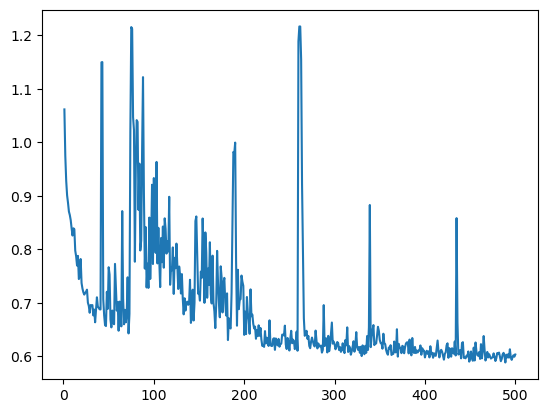

In [7]:
#https://stackoverflow.com/questions/62045186/using-softmax-activation-function-after-calculating-loss-from-bcewithlogitloss
vocab_size = len(word2index)+1 
embed_size = 80
num_layers = 2
heads= 8
device= "cuda"
forward_expansion= 4
dropout= 0.3 
max_lenght= source_vocab_max_size #max of any sequence
print_every = 100
epochs = 500
latent_space_dim = 500
hidden1 = 512
hidden2 = 1024
hidden3 = 512
  
def my_plot(epochs, loss):
    plt.plot(epochs, loss)

    
#k=6
#splits=KFold(n_splits=k,shuffle=True,random_state=42)


batch_size = [1]
learning_rate = [.001]

for batch in batch_size:
    for l_r in learning_rate:
        
        model = TransformerEncoder_LatentSpace_ClassifierModel.Encoder(vocab_size, 
                                                                       embed_size,
                                                                       num_layers,
                                                                       heads,
                                                                       device,
                                                                       forward_expansion, 
                                                                       dropout, 
                                                                       max_lenght, 
                                                                       batch_size).to(device)
        model.train()
        
        #WithLogits
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.AdamW(model.parameters(), lr=l_r)
        
        #for fold, (train_index, test_index) in enumerate(splits.split(data)):
            #X_train, X_test = data.iloc[train_index], data.iloc[test_index]
            
            #train = Custom_dataset_classification.MyDataset(X_train, source_vocab_max_size)
            #test = Custom_dataset_classification.MyDataset(X_test, source_vocab_max_size)
            
            
        train_loader=DataLoader(train, batch, shuffle=True)
        test_loader=DataLoader(test, batch, shuffle=False)

        steps = 0
        accuracy = 0
        loss_vals=  []
        for e in range(epochs):

            epoch_loss= []
            running_loss = 0
            for ii, (inputs, labels, seq) in enumerate(train_loader):
                inputs = inputs.to(device)
                labels = torch.tensor(labels)
                labels.to(device)
                optimizer.zero_grad()
                outputs = model.forward(inputs)
                #print(outputs)   
                #print(labels) 
                loss = criterion(outputs.to(device).float(), labels.to(device).float())

                loss.backward()
                epoch_loss.append(loss.item())
                optimizer.step()
                running_loss += loss.item()


                if steps % print_every == 0:
                    print("Epoch: {}/{}... ".format(e+1, epochs),
                          "Loss: {:.8f}".format(running_loss/print_every))
                    running_loss = 0
                    #accuracy = check_accuracy_on_test(train_loader, train = True)
                    #print('Accuracy of the network on train: %d %%' % (accuracy))
                steps += 1
                    
    
            loss_vals.append(sum(epoch_loss)/len(epoch_loss))
        my_plot(np.linspace(1, epochs, epochs).astype(int), loss_vals)